In [1]:
import os
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
import numpy as np
import pandas as pd

# visuals
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image

# Scikit-learn
from sklearn.model_selection import train_test_split

# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization,Conv2D
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

import math
import random

In [2]:
loaded_model = tf.keras.models.load_model("model.h5")

Metal device set to: Apple M2 Pro


2023-10-07 19:46:20.635307: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-07 19:46:20.635347: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [32]:
data = {"filename": ["6916_dog.jpg"], "label": ["cat"]}
datas = pd.DataFrame(data)

In [33]:
data_list = []
data_list.append(datas)

_data = pd.concat(data_list, ignore_index=True)


In [34]:
_data

,filename,label
0,6916_dog.jpg,cat


In [35]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(_data, 
                                                  directory = 'public/',
                                                  x_col= 'filename',
                                                  y_col= 'label',
                                                  batch_size = 32,
                                                  target_size = (128,128),
                                                  shuffle=False
                                                 )

Found 1 validated image filenames belonging to 1 classes.


In [36]:
# prediction
result = loaded_model.predict(test_generator,batch_size = 32,verbose = 0)


In [37]:
y_pred = np.argmax(result, axis = 1)

y_true = test_generator.labels


In [38]:
result

array([[0.00107011, 0.9989299 ]], dtype=float32)

In [39]:
def is_dog(parameter):
    if parameter == "Dog":
        return 1
    else:
        return 0
    
def is_dog_text(parameter):
    if parameter == 1:
        return "Dog"
    else:
        return "Cat"

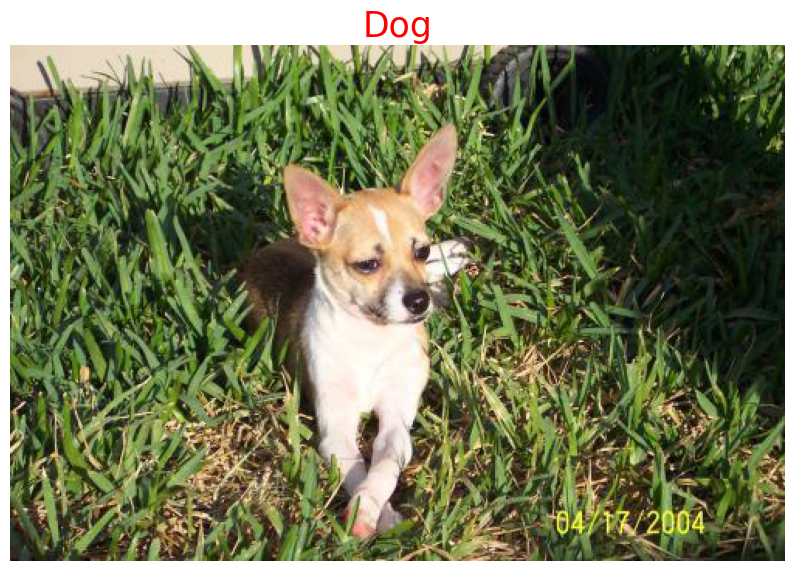

In [40]:
numbers_to_display = 1
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
random_numbers = [random.randint(0, 0) for _ in range(numbers_to_display)]
a = 0
for i in random_numbers:
    predicted_label = y_pred[i]
    name = _data.iloc[i]['filename']
    folder = _data.iloc[i]['label']
    path = "public/" + name
    plt.subplot(num_cells,num_cells, a+1)
    plt.grid(False)
    color_map = 'Green' if predicted_label == is_dog(_data.iloc[i]['label']) else 'Red'
    image = imread(path)
    plt.imshow(image)
    plt.title(is_dog_text(predicted_label), color=color_map, fontsize=25)
    plt.axis('off')
    a += 1
    
plt.show()